# Installing Library

In [1]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


# Import from Library

In [4]:
from IPython.display import HTML
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
from tensorflow.python.client import device_lib

# SPLIT DATA

In [9]:
#flow from directory helps divide dataset to training and validation dataset 
# and its important to note that you need to add data by installing splitfolder
#split folder will help split data into training, validation and test datasets.
# Specify the input directory and output directory

input_dir = r"C:\Users\PC\Downloads\VS\Pepper project" # Update this path
output_dir = "dataset"  # Your desired output directory

# Split the dataset
splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .1, .2))

Copying files: 2475 files [00:37, 65.72 files/s]


# Rescale and Rotation for Transformation

In [5]:
#rescale and rotation for transformation
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 1731 images belonging to 2 classes.


# Generator help directly load images from directory

In [6]:
#Generator help directly load images from directory
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5805555  0.5334967  0.5413398 ]
  [0.5842365  0.5371777  0.5450208 ]
  [0.5837417  0.5366829  0.54452604]
  ...
  [0.65133536 0.6317275  0.6591785 ]
  [0.6827984  0.66319054 0.6906415 ]
  [0.6862745  0.6666667  0.69411767]]

 [[0.5513371  0.5042783  0.51212144]
  [0.54999673 0.5029379  0.51078105]
  [0.55445004 0.5073912  0.51523435]
  ...
  [0.6522396  0.6326318  0.66008276]
  [0.6862745  0.6666667  0.69411767]
  [0.6856568  0.66604894 0.6934999 ]]

 [[0.5785824  0.5315235  0.53936666]
  [0.57170963 0.5246508  0.53249395]
  [0.5687408  0.5216819  0.52952504]
  ...
  [0.6566929  0.6370851  0.66453606]
  [0.6862745  0.6666667  0.69411767]
  [0.68169826 0.6620904  0.6895414 ]]

 ...

 [[0.66160107 0.6341501  0.66160107]
  [0.66606337 0.6386124  0.66606337]
  [0.6568062  0.6293552  0.6568062 ]
  ...
  [0.7222034  0.69867396 0.7457328 ]
  [0.7217086  0.6981792  0.745238  ]
  [0.72156864 0.69803923 0.74509805]]

 [[0.6625907  0.6351397  0.6625907 ]
  [0.66655815 0.63910717 0.66655815]


In [7]:

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 246 images belonging to 2 classes.


In [8]:
# therefore 3 generators were created
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 498 images belonging to 2 classes.


In [9]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    
])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,826 (1.06 MB)

 Trainable params: 277,826 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [11]:
1731/32

54.09375

In [12]:
246/32

7.6875

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=54,
    validation_data=validation_generator,
    validation_steps=7,
    epochs=20,
    verbose=1
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.5954 - loss: 0.6821 - val_accuracy: 0.8348 - val_loss: 0.4110
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8125 - loss: 0.4517 - val_accuracy: 0.7727 - val_loss: 0.5165
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8575 - loss: 0.3496 - val_accuracy: 0.9554 - val_loss: 0.1536
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9375 - loss: 0.1459 - val_accuracy: 0.9545 - val_loss: 0.1358
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9201 - loss: 0.2257 - val_accuracy: 0.9777 - val_loss: 0.0940
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9062 - loss: 0.1779 - val_accuracy: 1.0000 - val_loss: 0.0648
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9616 - loss: 0.1212 - val_accuracy: 0.9821 - val_loss: 0.0735
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 1.0000 - val_

In [14]:
scores = model.evaluate(test_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 1.0000 - loss: 0.0062


In [15]:
#Score is a list containing the Loss and Accuracy Value
scores

[0.006029562558978796, 1.0]

# plotting the Accuracy and Loss Curves

In [16]:
history

In [17]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [19]:
history.history['accuracy']

[0.6439082026481628,
 0.8125,
 0.8946439027786255,
 0.9375,
 0.9246615767478943,
 0.90625,
 0.9717481136322021,
 1.0,
 0.9793996214866638,
 1.0,
 0.9770452976226807,
 0.96875,
 0.9870511889457703,
 1.0,
 0.9899941086769104,
 1.0,
 0.9923484325408936,
 1.0,
 0.9964684844017029,
 1.0]

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss']

[0.6469533443450928,
 0.4517369270324707,
 0.31582894921302795,
 0.14592716097831726,
 0.24241255223751068,
 0.17788252234458923,
 0.12094371020793915,
 0.052091505378484726,
 0.0910339429974556,
 0.0503285713493824,
 0.07603485882282257,
 0.10023242980241776,
 0.06229285150766373,
 0.003779302816838026,
 0.04650562256574631,
 0.010571333579719067,
 0.03401781991124153,
 0.018640365451574326,
 0.020096931606531143,
 0.011377541348338127]

In [23]:
history.history['val_loss'] 

[0.4109806418418884,
 0.5164636373519897,
 0.15355856716632843,
 0.13580335676670074,
 0.09398635476827621,
 0.06480446457862854,
 0.07349491119384766,
 0.04745328426361084,
 0.12390772998332977,
 0.021384989842772484,
 0.02393333986401558,
 0.03756008669734001,
 0.01499689556658268,
 0.003502952167764306,
 0.005876582581549883,
 0.004335383884608746,
 0.009811299853026867,
 0.005229931324720383,
 0.007000765297561884,
 0.013580135069787502]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 

In [25]:
val_acc

[0.8348214030265808,
 0.7727272510528564,
 0.9553571343421936,
 0.9545454382896423,
 0.9776785969734192,
 1.0,
 0.9821428656578064,
 1.0,
 0.9464285969734192,
 1.0,
 1.0,
 1.0,
 0.9910714030265808,
 1.0,
 1.0,
 1.0,
 0.9955357313156128,
 1.0,
 1.0,
 1.0]

In [26]:
acc

[0.6439082026481628,
 0.8125,
 0.8946439027786255,
 0.9375,
 0.9246615767478943,
 0.90625,
 0.9717481136322021,
 1.0,
 0.9793996214866638,
 1.0,
 0.9770452976226807,
 0.96875,
 0.9870511889457703,
 1.0,
 0.9899941086769104,
 1.0,
 0.9923484325408936,
 1.0,
 0.9964684844017029,
 1.0]

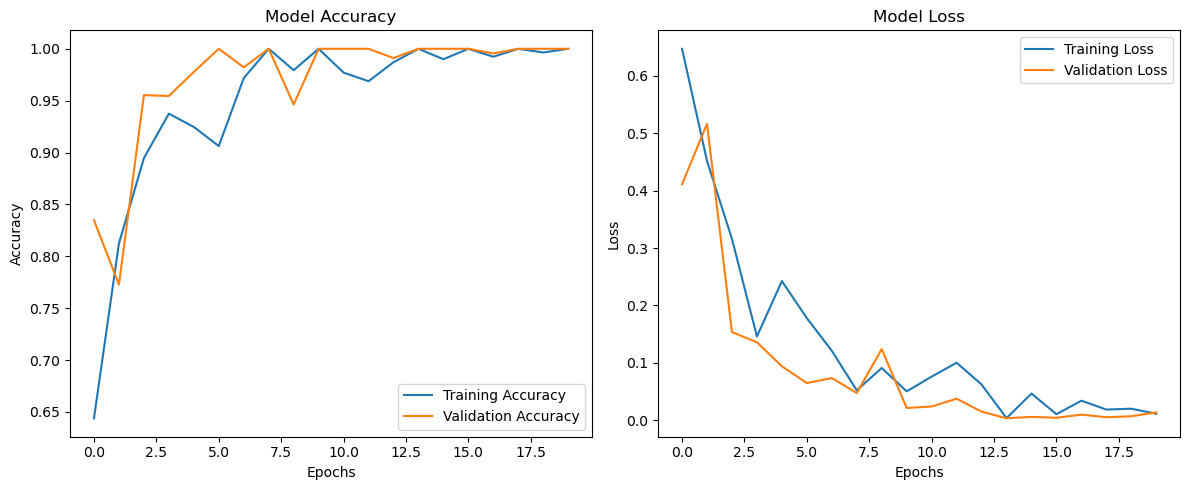

In [27]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


# RUN PREDICTION ON A SAMPLE IMAGE

In [35]:
#generate class names
class_names = list(train_generator.class_indices.keys())
print('Class names:', class_names)

Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


first image to predict
actual label: Pepper__bell___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
predicted label: Pepper__bell___Bacterial_spot


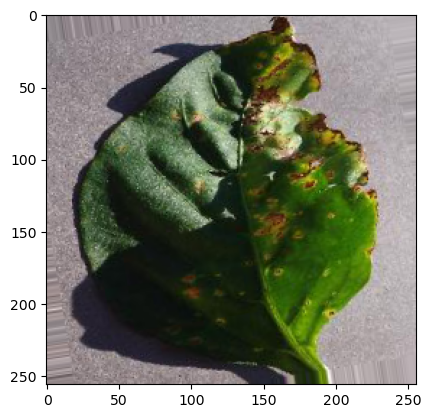

In [36]:
#making a prediction
import numpy as np

for images_batch, label_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break

In [37]:

print(device_lib.list_local_devices())  # Check if your GPU is detected

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2468153075278493268
xla_global_id: -1
]


In [38]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


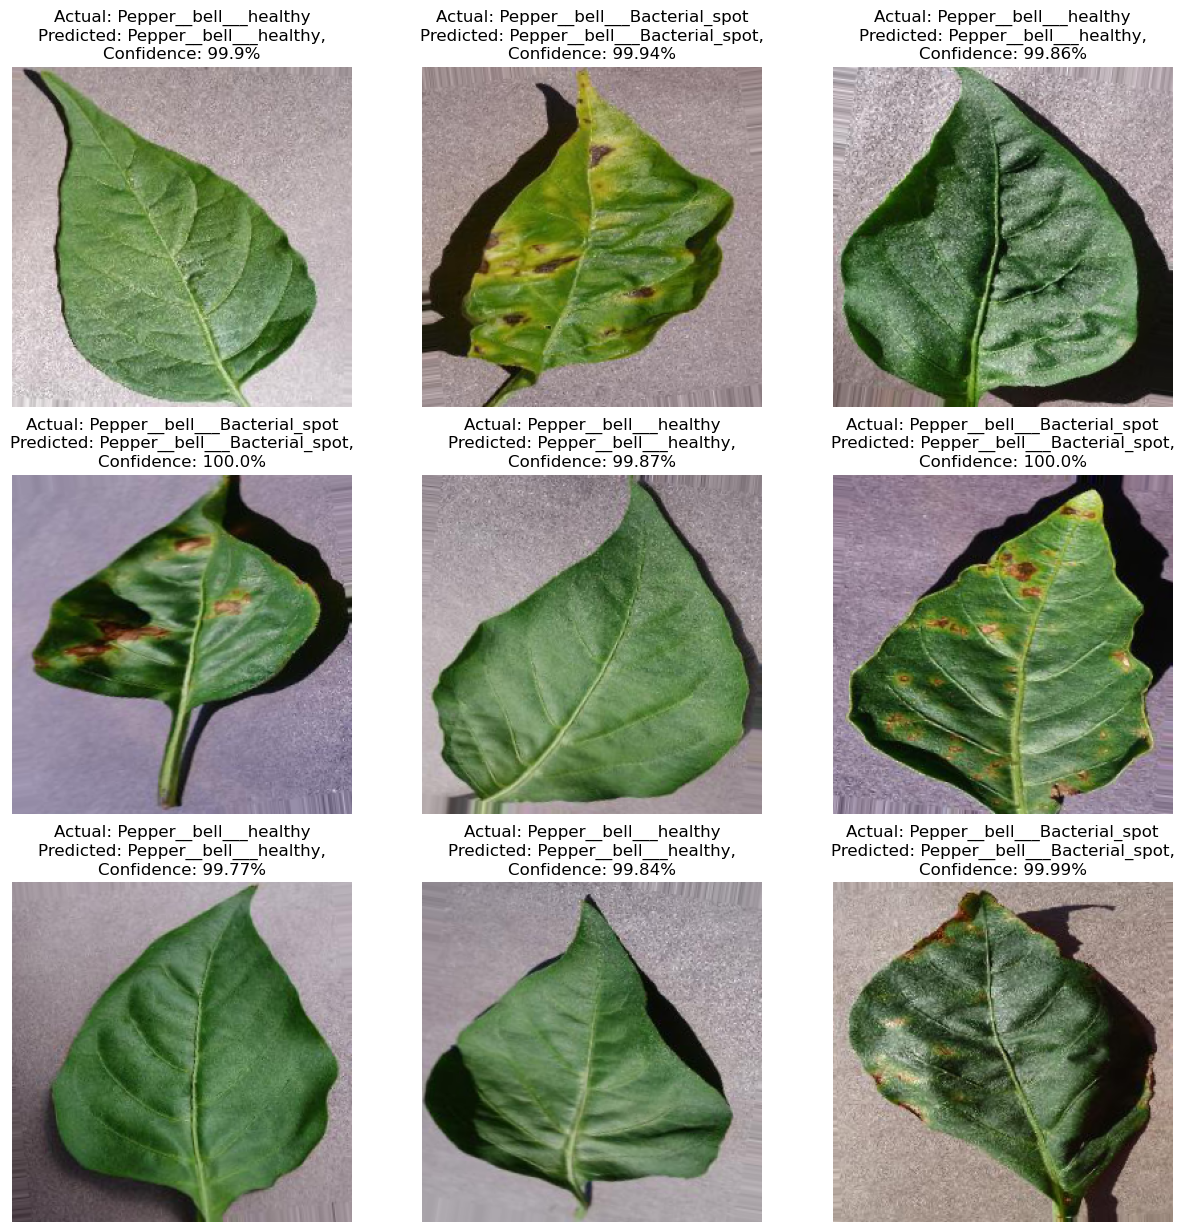

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        
        plt.axis('off')
        
    break  


# SAVING THE MODEL 

In [42]:
import os

model_version = 1
save_dir = f'../Pepper project/models/'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(f'{save_dir}model_v{model_version}.keras')


In [43]:
model_version = 1
model.save(f'../Pepper project/models/model_v{model_version}.h5')
